# TEXT PROCESSING

In [11]:
!conda install -c conda-forge  wordcloud

Solving environment: ...working... failed


WARNING conda.base.context:use_only_tar_bz2(632): Conda is constrained to only using the old .tar.bz2 file format because you have conda-build installed, and it is <3.18.3.  Update or remove conda-build to get smaller downloads and faster extractions.

UnsatisfiableError: The following specifications were found to be incompatible with each other:

  - anaconda==2018.12=py37_0 -> entrypoints==0.2.3=py37_2
  - anaconda==2018.12=py37_0 -> importlib_metadata==0.6=py37_0
  - anaconda==2018.12=py37_0 -> mkl-service==1.1.2=py37hb782905_5
  - entrypoints
  - importlib_metadata
  - mkl-service
  - pip -> python=3.6





In [10]:
from collections import defaultdict
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import os
from bs4 import BeautifulSoup
import urllib.request
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import matplotlib
from matplotlib import pyplot as plt
from nltk.classify import NaiveBayesClassifier
import string
import re
# import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from os import path
from PIL import Image
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline

ModuleNotFoundError: No module named 'wordcloud'

### Extract from web

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sbenoist\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
path = 'http://www.businessinsider.fr/us/sustainable-organic-cotton-clothes-bedding-2019-1'
html = urllib.request.urlopen(path).read()
soup = BeautifulSoup(html,'html5lib')


In [15]:
#Remove punctuation and stop words
text = soup.get_text(strip = False)
punct = list(string.punctuation)
tokens = [i.lower() for i in text.split()]
sr= nltk.corpus.stopwords.words('english')
sr = sr + punct
#Remove numbers
pattern = '[0-9]*'
tokens = [re.sub(pattern, '', i) for i in tokens] 

#OR
tokens = [''.join(x for x in i if x.isalpha()) for i in tokens]

#OR
#Remove punctuations
text = re.sub('[^a-zA-Z]', ' ', text)   
#Convert to lowercase
text = text.lower()
#remove tags
text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
# remove special characters and digits
text=re.sub("(\\d|\\W)+"," ",text)

In [16]:
#Remove stop words
text = soup.get_text(strip = True)
tokens = [i.lower() for i in text.split()]
sr= nltk.corpus.stopwords.words('english')

In [17]:
#Use regex
words_startding_with_ing = [w for w in tokens if re.search('^color:', w)]
words_containing_hashtag = [w for w in tokens if re.search('[#]+', w)]
sr = sr + words_startding_with_ing +words_containing_hashtag 

In [21]:
clean_tokens = tokens[:]
for i in tokens:
    if i in sr:
        clean_tokens.remove(i)
    elif len(i)<2:
        clean_tokens.remove(i)


### Wordcloud

In [9]:
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(text))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

NameError: name 'WordCloud' is not defined

### Normalization

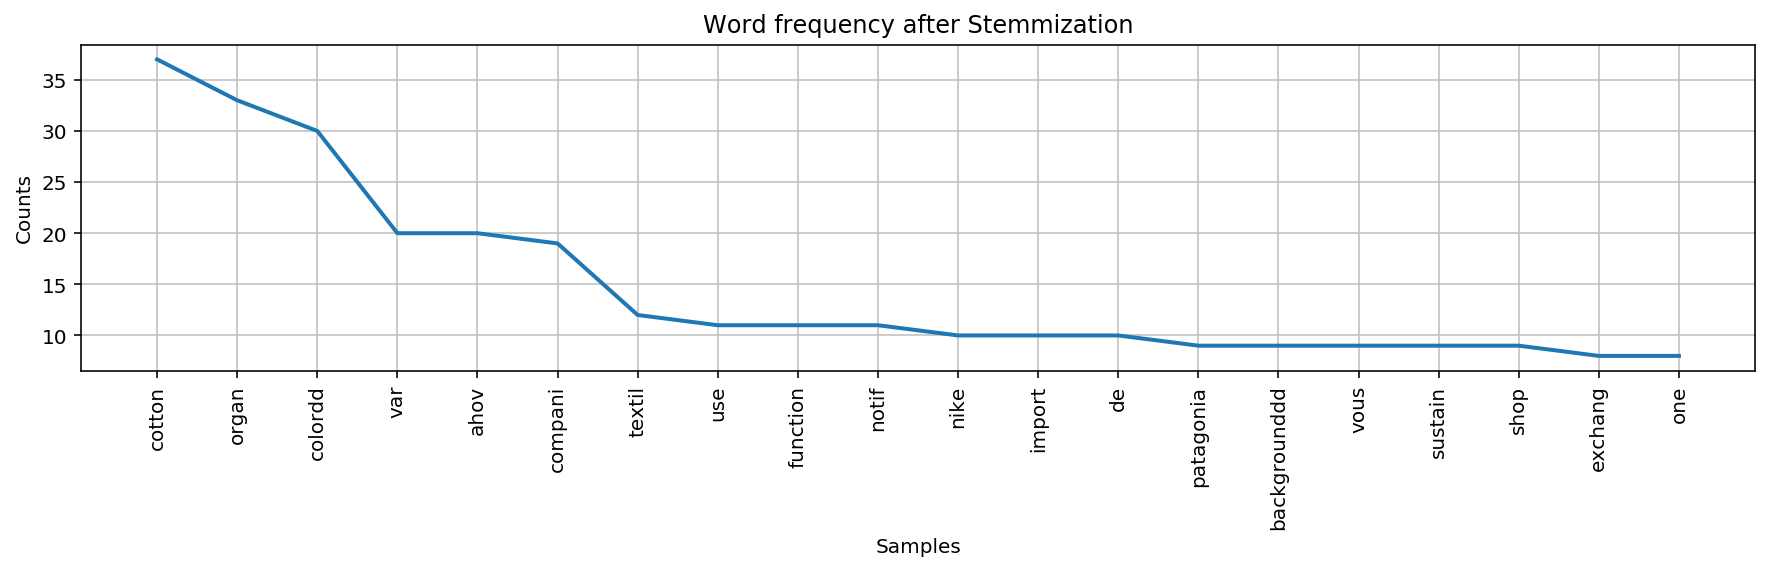

In [18]:

#Stemming
stemmer = SnowballStemmer("english")
clean_tokens_stem = [stemmer.stem(word) for word in clean_tokens]
freq = nltk.FreqDist(clean_tokens_stem) 

#Plot First 30 words
plt.figure(figsize=(15,3))
plt.title('Word frequency after Stemmization')
freq.plot(20, cumulative=False)

In [78]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sbenoist\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

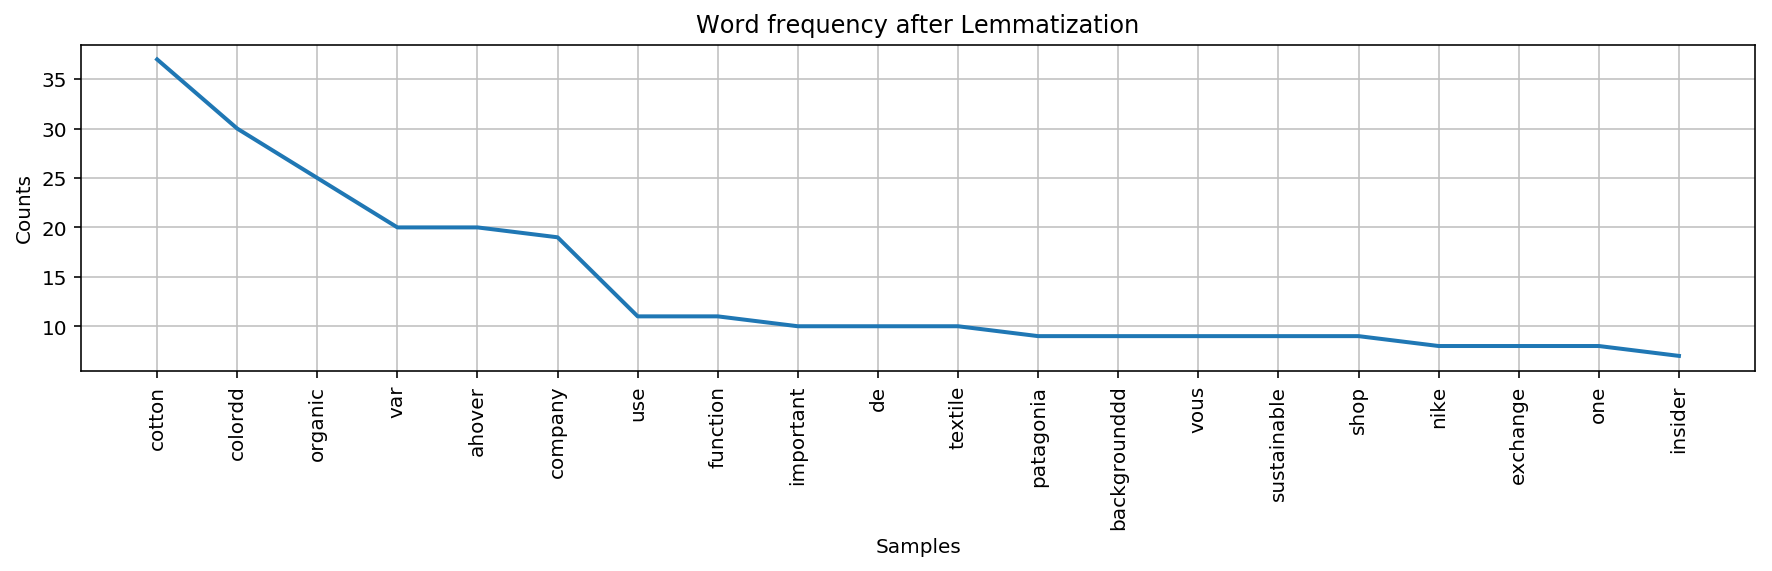

In [19]:
#lemmatization 
lem = WordNetLemmatizer()
lemm_words=[]
for w in clean_tokens:
    lemm_words.append(lem.lemmatize(w, 'v'))
freq = nltk.FreqDist(lemm_words) 
#Plot First 30 words
plt.figure(figsize=(15,3))
plt.title('Word frequency after Lemmatization')
freq.plot(20, cumulative=False)

In [49]:
cv=CountVectorizer(stop_words=sr, max_features=10000, ngram_range=(1,3))
bag_of_words=cv.fit_transform([' '.join(clean_tokens)])
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
print(list(cv.vocabulary_.keys())[:10])

['window', 'nreum', '__nr_require', 'function', 'var', 'exports', 'call', 'return', 'typeof', 'length']


C:\Users\sbenoist\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['039', '148000', '196d8d', '222jquery', 'abonner', 'anchor', 'background', 'border', 'bottom', 'calendar', 'color', 'connect', 'display', 'en_us', 'facebook', 'hover', 'img', 'jquery', 'js', 'left', 'net', 'none', 'post', 'prepend', 'right', 'sdk', 'style', 'submit', 'top', 'v2', 'version', 'wp', 'xfbml'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [52]:
cv = CountVectorizer(ngram_range=(2,2), max_features=2000)
bag_of_words=cv.fit_transform([' '.join(clean_tokens)])
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
print(list(cv.vocabulary_.keys())[:10])

['window nreum', 'nreum nreum', 'nreum __nr_require', '__nr_require function', 'function function', 'function if', 'if var', 'var exports', 'call exports', 'exports function']


[Text(0, 0, 'onesignal_options notifybutton'),
 Text(0, 0, 'organic cotton'),
 Text(0, 0, 'function function'),
 Text(0, 0, 'notifybutton text'),
 Text(0, 0, 'function var'),
 Text(0, 0, 'www businessinsider'),
 Text(0, 0, 'businessinsider fr'),
 Text(0, 0, 'onesignal_options promptoptions'),
 Text(0, 0, 'function return'),
 Text(0, 0, 'https www'),
 Text(0, 0, 'textile exchange'),
 Text(0, 0, 'return function'),
 Text(0, 0, 'parentnode insertbefore'),
 Text(0, 0, 'hover post'),
 Text(0, 0, 'post content'),
 Text(0, 0, 'supply chain'),
 Text(0, 0, 'function if'),
 Text(0, 0, 'for var'),
 Text(0, 0, 'window document'),
 Text(0, 0, '8203 56128')]

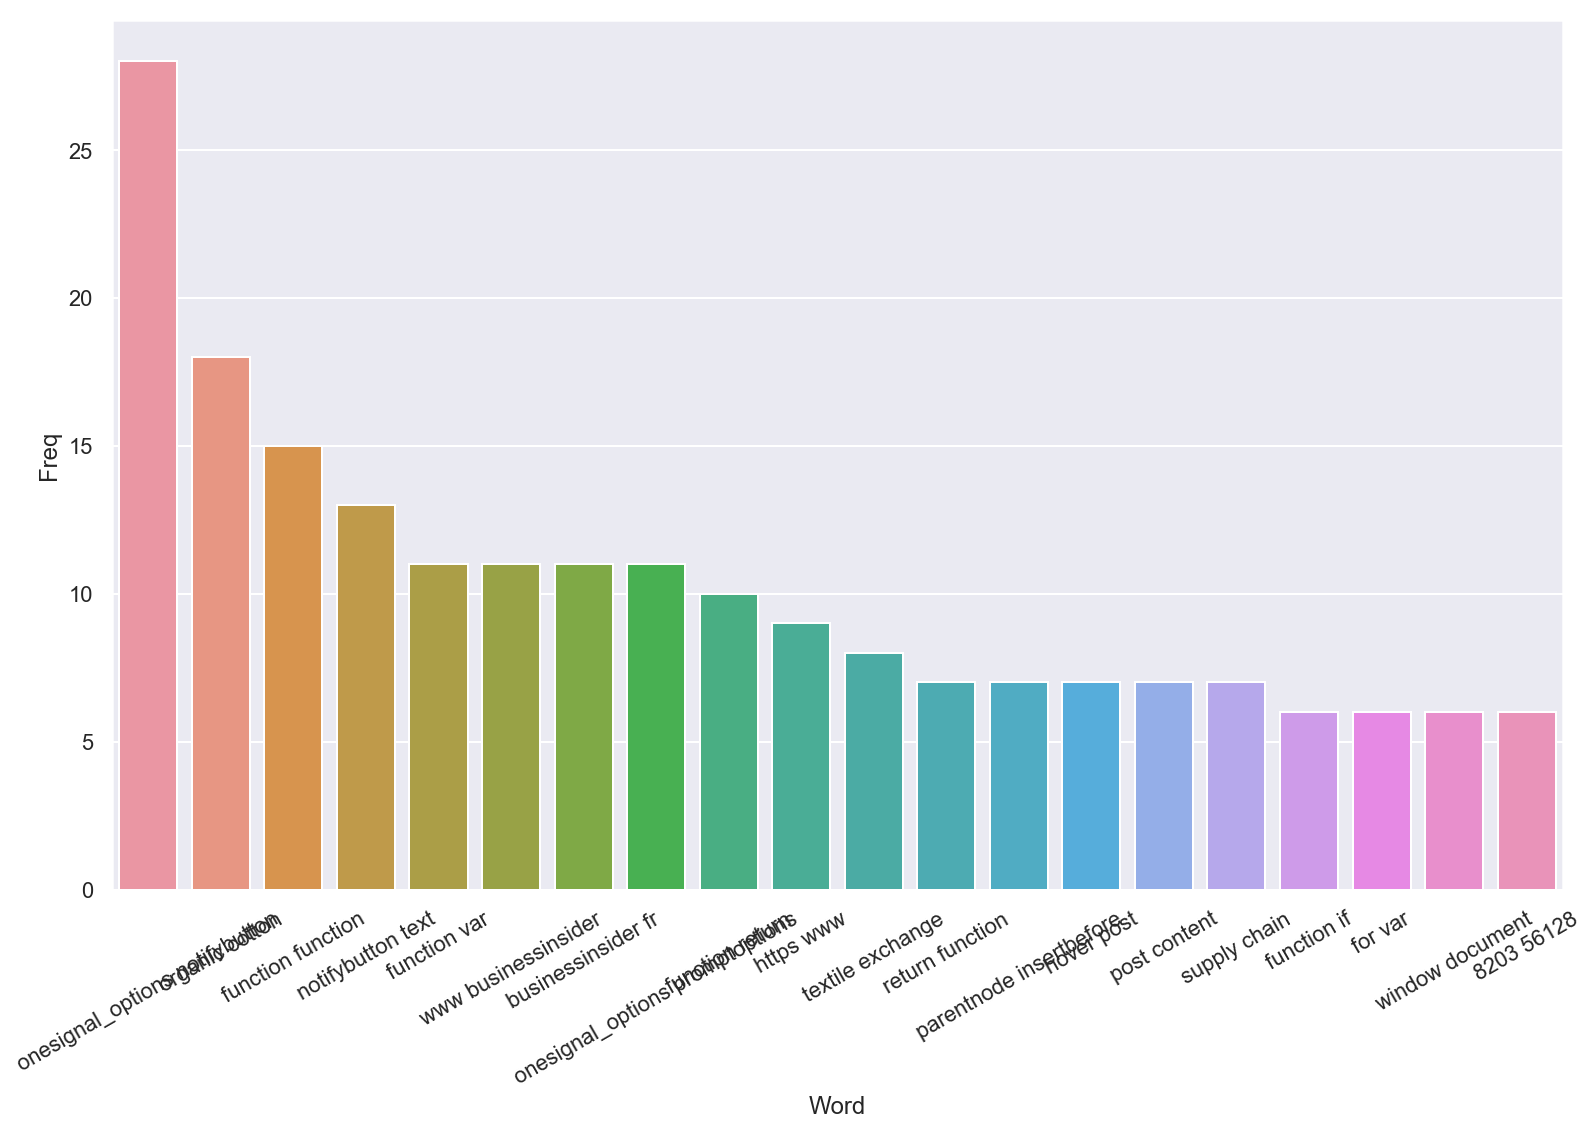

In [53]:
#Convert most freq words to dataframe for plotting bar plot
top_df = pd.DataFrame(words_freq[:20])
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)